In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, device):
        self.device = device
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128, device=self.device)
        self.fc2 = nn.Linear(128, 64, device=self.device)
        self.fc3 = nn.Linear(64, 10, device=self.device)

    def forward(self, x):
        x = torch.flatten(x, 1).to(self.device)
        x = torch.relu(self.fc1(x)).to(self.device)
        x = torch.relu(self.fc2(x)).to(self.device)
        x = self.fc3(x)
        return x

# Instantiate the model and move it to the GPU
model = SimpleNN(device).to(device)



In [24]:
print(next(model.parameters()).device)
print(next(model.parameters()).device)
print(next(model.parameters()).device)

cuda:0
cuda:0
cuda:0


In [25]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

print (len(train_loader))
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Move tensors to the GPU
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")


938
Epoch [1/5], Loss: 0.1604
Epoch [2/5], Loss: 0.0372
Epoch [3/5], Loss: 0.1279
Epoch [4/5], Loss: 0.0444
Epoch [5/5], Loss: 0.0535
Training complete!


In [7]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Load the test dataset
test_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

test_dataset = datasets.MNIST(root='./data', train=False, transform=test_transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define a function to test the model
def test_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move tensors to the GPU
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the model on the test set
accuracy = test_model(model, test_loader, device)
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')


Accuracy of the model on the test set: 96.62%


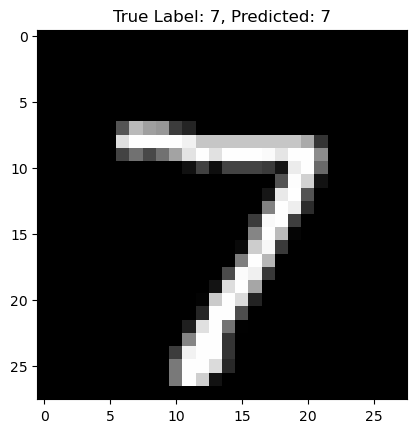

In [8]:
import torch
import matplotlib.pyplot as plt

# Function to display an image and its prediction
def display_test_example(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    images, labels = next(iter(test_loader))  # Get a batch of test images
    images, labels = images.to(device), labels.to(device)  # Move tensors to the GPU

    # Get the model's predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

    # Display the first image and its predicted label
    image = images[0].cpu().numpy().squeeze()
    label = labels[0].cpu().item()
    prediction = predicted[0].cpu().item()

    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {label}, Predicted: {prediction}')
    plt.show()

# Call the function to display a test example
display_test_example(model, test_loader, device)
